# 词云展示

***注：本流程中展示的词云并非前端展示，前端需要django配合eharts***

读取数据库职位描述数据->根据linefeed关键字分句->去除标点符号及数字->去除停用词->词频统计

In [1]:
import nltk
import pymysql
import matplotlib.pyplot as plt
import wordcloud
import re
import collections
import numpy as np
import jieba

In [2]:
def readData(unifyName):
    '''
    连接数据库根据unifyName
    返回jobinfo信息，格式是元组，每一条数据也是单个元组
    '''
    conn = pymysql.connect(host="localhost", port=3306, user="root", passwd="Woshishabi2813", db="job", charset="utf8")
    cur = conn.cursor()
    selectCommand = "select jobInfo from jobinfo where unifyName='"+unifyName+"';"
    cur.execute(selectCommand)
    cur.close()
    conn.close()
    return cur.fetchmany(1000)

In [3]:
def splitParagraph(result):
    '''
    数据库查询到的结果进行分段
    '''
    text = ''
    for r in result:
        paragraph = "".join(r)
        sentenceList = paragraph.split("linefeed")
        for sentence in sentenceList:
            #去除长度小于20的信息,类似”微信分享“等无用信息
            if len(sentence.strip())>20:
                text += sentence
    return text

In [4]:
def reComplie(text):
    '''
    正则清楚标点符号和数字
    '''
    pattern = re.compile('\t|\n|\.|-|:|;|\)|\(|\?|"|。|、|，|,|；|/|[1234567890]') # 定义正则表达式匹配模式
    return re.sub(pattern, '', text) 

In [5]:
def jiebaCut(text):
    '''
    结巴分词
    '''
    jiebaCutList = jieba.cut(text, cut_all =False) # 精确模式分词
    removeWordList = ['随着', '对于','通常','如果','我们','需要','具有','以上','能力','优先','工作','公司','具备',
                     '良好','熟悉','相关','负责','完成','基于','以上学历'] # 自定义去除词库
    objectList = []
    for word in jiebaCutList: 
        #要求分词的长度大于1
        if word not in removeWordList and len(word)>1:
            objectList.append(word)
    return objectList

In [6]:
def wordCloud(objectList):
    '''
    词云绘制
    '''
    wordCountList = collections.Counter(objectList) # 对分词做词频统计
    wc = wordcloud.WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
        max_words=500, # 最多显示词数
        max_font_size=100, # 字体最大值
        background_color="white",
        margin=2
    )
    wc.generate_from_frequencies(wordCountList) # 从字典生成词云
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show() # 显示图像

In [7]:
def printWordCloud(unifyName):
    result = readData(unifyName)
    result = splitParagraph(result)
    result = reComplie(result)
    result = jiebaCut(result)
    wordCloud(result)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\19116\AppData\Local\Temp\jieba.cache
Loading model cost 0.780 seconds.
Prefix dict has been built successfully.


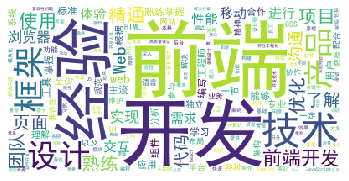

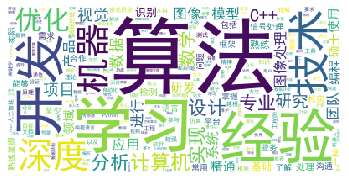

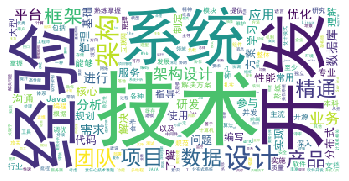

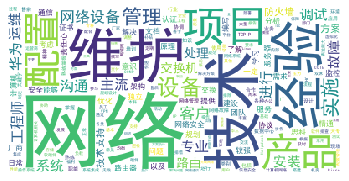

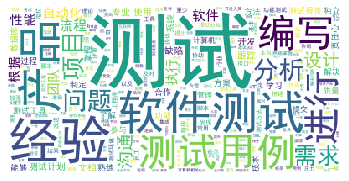

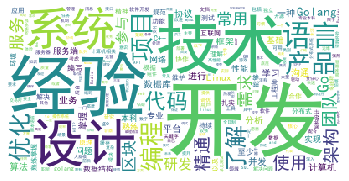

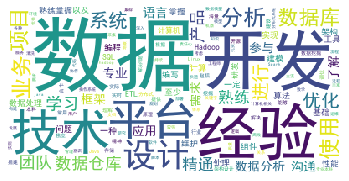

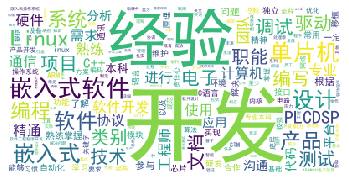

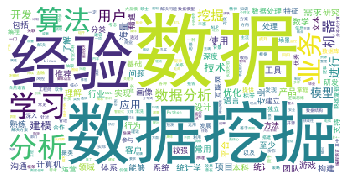

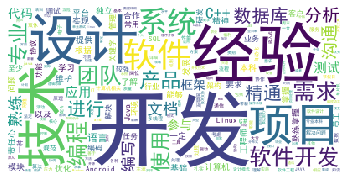

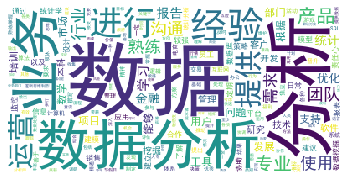

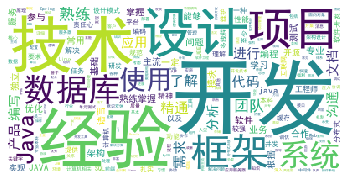

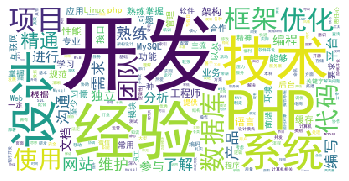

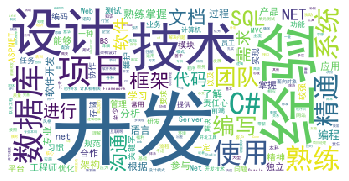

In [ ]:
unifyNameList = ['前端','算法','架构','网络工程师','软件测试','Go','大数据开发','嵌入式软件','数据挖掘','软件开发','数据分析','Java','PHP','.NET',
'Python','C++','软件运维','全栈','C#','网络运维','电子商务','数据库开发','IOS','游戏开发','后端','大数据工程师','网络安全','大数据分析','机器学习','数据库管理','深度学习','安卓','JavaScript','爬虫',
'大数据挖掘','Ruby','Swift','数据库运维','大数据架构']
for unifyName in unifyNameList:
    printWordCloud(unifyName)